# HW-3 CNN超參數設定實驗報告

## 導入資料庫

In [1]:
import os
import random
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D ,Dense ,Activation ,MaxPooling2D ,Dropout ,Flatten
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from keras.utils import np_utils
from PIL import Image

## LOAD DATA

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


# 參數設定

In [3]:
#總共有幾種
batch_size = 128
num_classes = 10
epochs = 10

# 資料前處裡

In [4]:
#正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#one-hot encoding
y_train = np_utils.to_categorical(y_train, num_classes)
y_test  = np_utils.to_categorical(y_test, num_classes)

## Build Model

In [5]:
#編輯model
model = Sequential()
#卷積層
model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
#池化層
model.add(MaxPooling2D(pool_size=(3,3)))
#Flatten層
model.add(Flatten())
#全連接層
model.add(Dense(128, activation='relu'))
#輸出層
model.add(Dense(10, activation='softmax'))


model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               204928    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 206,666
Trainable params: 206,666
Non-trainable params: 0
__________________________________________________

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

train_history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    shuffle=True)



#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

Epoch 1/10
391/391 [==============================] - 5s 13ms/step - loss: 1.7110 - accuracy: 0.3905 - val_loss: 1.5636 - val_accuracy: 0.4469
Epoch 2/10
391/391 [==============================] - 5s 13ms/step - loss: 1.3748 - accuracy: 0.5178 - val_loss: 1.3132 - val_accuracy: 0.5418
Epoch 3/10
391/391 [==============================] - 5s 12ms/step - loss: 1.2591 - accuracy: 0.5594 - val_loss: 1.1899 - val_accuracy: 0.5831
Epoch 4/10
391/391 [==============================] - 5s 13ms/step - loss: 1.1742 - accuracy: 0.5907 - val_loss: 1.2149 - val_accuracy: 0.5792
Epoch 5/10
391/391 [==============================] - 5s 13ms/step - loss: 1.1087 - accuracy: 0.6140 - val_loss: 1.1565 - val_accuracy: 0.5944
Epoch 6/10
391/391 [==============================] - 5s 13ms/step - loss: 1.0545 - accuracy: 0.6318 - val_loss: 1.1150 - val_accuracy: 0.6072
Epoch 7/10
391/391 [==============================] - 5s 13ms/step - loss: 1.0071 - accuracy: 0.6509 - val_loss: 1.0596 - val_accuracy: 0.6304

## 訓練歷程

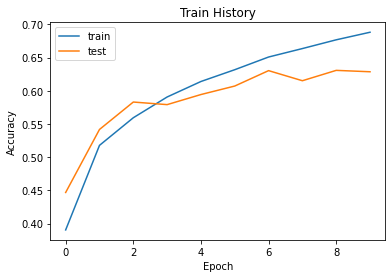

In [7]:
def show_train_history_acc(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    

    
show_train_history_acc('accuracy','val_accuracy')

